# preprocessing

In [16]:
data = pd.read_csv('data_no8.csv')
data_x = data.iloc[:, data.columns!= 'DE1_dg' ]
data_y = data.iloc[:,data.columns=='DE1_dg']

In [15]:
# data_xx.to_csv('data_x.csv', index=False)

In [17]:
# data_y.loc[data_y['DE1_dg']==8.0,:] = 0
# data_y.loc[data_y['DE1_dg']==9.0,:] = 0
data_y['DE1_dg'].value_counts()

0.0    20949
1.0     3398
Name: DE1_dg, dtype: int64

In [18]:
data_y.to_csv('data_y.csv', index=False)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
data_pre = StandardScaler().fit(data.iloc[:,data.columns!='DE1_dg'])

In [21]:
data_x_norm = data_pre.transform(data.iloc[:,data.columns!='DE1_dg'])

In [22]:
np.save('data_x_norm', data_x_norm)

# begin

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# data_x_norm = np.array(data_x)
# data_y = np.array(data_y)

In [3]:
# data_x = np.loadtxt('data_x.csv',skiprows=1, delimiter=',')
data_x_norm = np.load('data_x_norm.npy')
data_y = np.loadtxt('data_y.csv', skiprows=1, delimiter=',')


In [4]:
data_y = data_y.reshape(-1,1)

In [5]:
print(data_x_norm.shape)
print(data_y.shape)

(24347, 321)
(24347, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_x_norm, data_y, test_size=0.2)

In [7]:
X = tf.placeholder(tf.float32, shape=(None, 321))
Y = tf.placeholder(tf.float32, shape=(None,1))
training = tf.placeholder(tf.bool)

In [8]:
#layers
L = 6
# units
units=[X.shape[1] ,256,128,64,32,16,8,1]   

W1 = tf.get_variable('W1',shape=[units[0],units[1]], initializer= tf.contrib.layers.xavier_initializer())
B1 = tf.Variable(tf.random_normal([units[1]]))
Z1 = tf.matmul(X,W1)+B1
Z1 = tf.layers.batch_normalization(Z1)
A1 = tf.nn.relu(Z1)
dropout1 = tf.layers.dropout(A1, rate=0.2, training=training)

W2 = tf.get_variable('W2',shape=[ units[1],units[2]], initializer= tf.contrib.layers.variance_scaling_initializer())
B2 = tf.Variable(tf.random_normal([units[2]]))
Z2 = tf.matmul(A1,W2)+B2
Z2 = tf.layers.batch_normalization(Z2)
A2 = tf.nn.relu(Z2)
dropout2 = tf.layers.dropout(A2, rate=0.2, training=training)

W3 = tf.get_variable('W3',shape=[ units[2],units[3]], initializer= tf.contrib.layers.variance_scaling_initializer())
B3 = tf.Variable(tf.random_normal([units[3]]))
Z3 = tf.matmul(A2,W3)+B3
Z3 = tf.layers.batch_normalization(Z3)
A3 = tf.nn.relu(Z3)
dropout3 = tf.layers.dropout(A3, rate=0.2, training=training)

W4 = tf.get_variable('W4',shape=[ units[3],units[4]], initializer= tf.contrib.layers.variance_scaling_initializer())
B4 = tf.Variable(tf.random_normal([units[4]]))
Z4 = tf.matmul(A3,W4)+B4
Z4 = tf.layers.batch_normalization(Z4)
A4 = tf.nn.relu(Z4)
dropout4 = tf.layers.dropout(A4, rate=0.2, training=training)

W5 = tf.get_variable('W5', shape = [units[4], units[5]], initializer = tf.contrib.layers.variance_scaling_initializer())
B5 = tf.Variable(tf.random_normal([units[5]]))
Z5 = tf.matmul(A4,W5)+B5
Z5 = tf.layers.batch_normalization(Z5)
A5 = tf.nn.relu(Z5)
dropout5 = tf.layers.dropout(A5, rate=0.2, training=training)

W6 = tf.get_variable('W6', shape = [units[5], units[6]], initializer = tf.contrib.layers.variance_scaling_initializer())
B6 = tf.Variable(tf.random_normal([units[6]]))
Z6 = tf.matmul(A5,W6)+B6
Z6 = tf.layers.batch_normalization(Z6)
A6 = tf.nn.sigmoid(Z6)
dropout6 = tf.layers.dropout(A6, rate=0.2, training=training)

W7 = tf.get_variable('W7', shape = [units[6], units[7]], initializer = tf.contrib.layers.variance_scaling_initializer())
B7 = tf.Variable(tf.random_normal([units[7]]))
Z7 = tf.matmul(A6,W7)+B7


# cost = tf.reduce_mean(tf.matmul(tf.log(tf.transpose(logits)),Y) + 
#                                  tf.matmul(tf.log(1-tf.transpose(logits)),(1-Y)))
cost = tf.reduce_mean(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels= Y, logits=Z7)))
# cost = -tf.reduce_mean(tf.reduce_sum((Y * tf.log(logits)) + ((1-Y) * tf.log(1-logits))))
# cost = -tf.reduce_mean(Y * tf.log(logits) + (1 - Y) * tf.log(1 - logits),axis=0)
# cost  = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(logits),axis=1))

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# predicted = tf.nn.sigmoid(Z5)
# correct_pred = tf.equal(tf.round(predicted), Y)
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [13]:

# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# mini -> 128 ->500
mini = 500
epoch=4000
n_mini = epoch//mini
for i in range(epoch):
    for j in range(n_mini):
        c , _ = sess.run([cost, optimizer], 
                         feed_dict={X: X_train[j * mini : (j+1) * mini], Y: y_train[j * mini : (j+1) * mini],
                                   training:True})
    c , _ = sess.run([cost, optimizer], 
                         feed_dict={X: X_train[n_mini * mini :], Y: y_train[n_mini * mini :],
                                   training:True})
    
    if i%100==0:
        print('iter : {}, cost : {}'.format(i,c))

iter : 0, cost : 204.38754272460938
iter : 100, cost : 197.24627685546875
iter : 200, cost : 79.94312286376953
iter : 300, cost : 71.14630126953125
iter : 400, cost : 67.66644287109375
iter : 500, cost : 65.84284973144531
iter : 600, cost : 64.27703857421875
iter : 700, cost : 41.407203674316406
iter : 800, cost : 41.020484924316406
iter : 900, cost : 40.731903076171875
iter : 1000, cost : 39.966392517089844
iter : 1100, cost : 39.457420349121094
iter : 1200, cost : 23.557254791259766
iter : 1300, cost : 22.742835998535156
iter : 1400, cost : 22.299514770507812
iter : 1500, cost : 21.849695205688477
iter : 1600, cost : 18.888526916503906
iter : 1700, cost : 18.284435272216797
iter : 1800, cost : 17.93531608581543
iter : 1900, cost : 17.639572143554688
iter : 2000, cost : 17.367820739746094
iter : 2100, cost : 17.094396591186523
iter : 2200, cost : 16.81051254272461
iter : 2300, cost : 16.517288208007812
iter : 2400, cost : 16.21856689453125
iter : 2500, cost : 15.917881965637207
iter :

In [14]:
yhat_test = sess.run(tf.round(tf.nn.sigmoid(Z7)), feed_dict={X:X_test, training:False})

In [15]:
#accuracy
np.mean(np.equal(yhat_test,y_test))

0.9277207392197125

In [16]:
#f1 score
f1_score(y_test,yhat_test)

0.7345399698340874

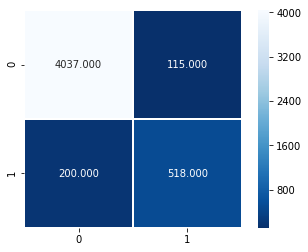

In [38]:
# confusion matrix
cm = confusion_matrix(y_test, yhat_test)
sns.heatmap(cm,annot=True,fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [43]:
#model save
saver = tf.train.Saver()
saver.save(sess,'c:/users/nb-0242/jupyter/PHR_DNN')

'c:/users/nb-0242/jupyter/PHR_DNN'